In [2]:
import tensorflow as tf

def load_and_preprocess_data():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0

    y_train = tf.keras.utils.to_categorical(y_train, 10)
    y_test = tf.keras.utils.to_categorical(y_test, 10)

    return (x_train, y_train), (x_test, y_test)


def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

def train(model, x_train, y_train):
    history = model.fit(x_train, y_train,
                        batch_size=128,
                        epochs=20,
                        validation_split=0.2,
                        verbose=1)
    return history


(x_train, y_train), (x_test, y_test) = load_and_preprocess_data()

model = create_model()

from tensorflow.keras.utils import plot_model
from IPython.display import Image

plot_model(
    model,
    to_file="model_cifar.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)
Image('model_cifar.png')

history = train(model, x_train, y_train)


test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 63s 196ms/step - accuracy: 0.2803 - loss: 1.9196 - val_accuracy: 0.4961 - val_loss: 1.3987
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 195ms/step - accuracy: 0.4937 - loss: 1.3952 - val_accuracy: 0.5561 - val_loss: 1.2967
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 84s 201ms/step - accuracy: 0.5653 - loss: 1.2248 - val_accuracy: 0.6178 - val_loss: 1.0910
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 60s 191ms/step - accuracy: 0.6073 - loss: 1.1132 - val_accuracy: 0.6348 - val_loss: 1.0356
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 60s 190ms/step - accuracy: 0.6327 - loss: 1.0330 - val_accuracy: 0.6559 - val_loss: 0.9774
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 62s 198ms/step - accuracy: 0.6695 - loss: 0.9479 - val_accuracy: 0.6625 - val_loss: 0.9698
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 59s 188ms/step - accuracy: 0.6956 - loss: 0.8770 - val_accuracy: 0.6831 - val_loss: 0.9029
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 187ms/step - accuracy: 0.7093 - loss: 0

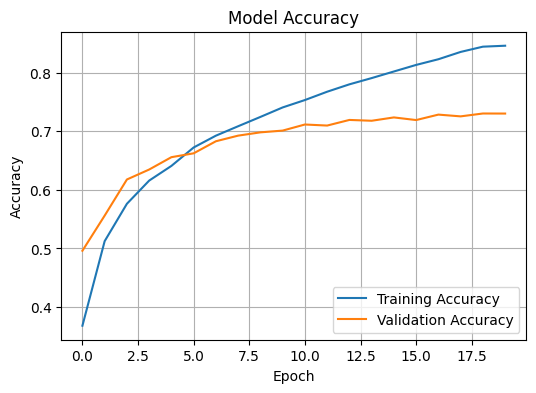

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.show()

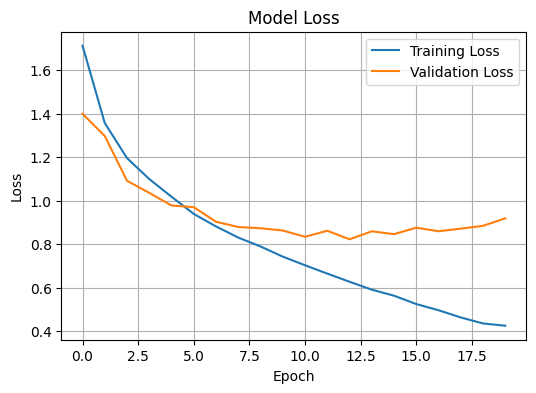

In [4]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


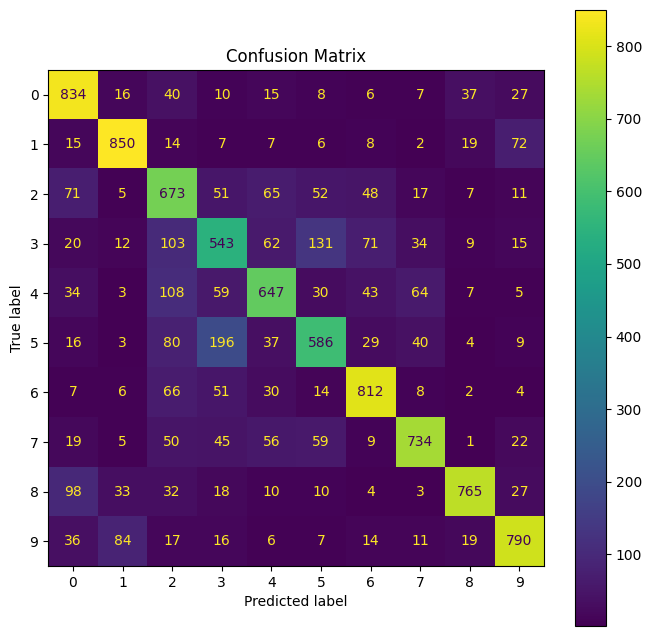

In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 8))
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=np.arange(10))
disp.plot( values_format='d', ax=plt.gca())
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()


<Axes: >

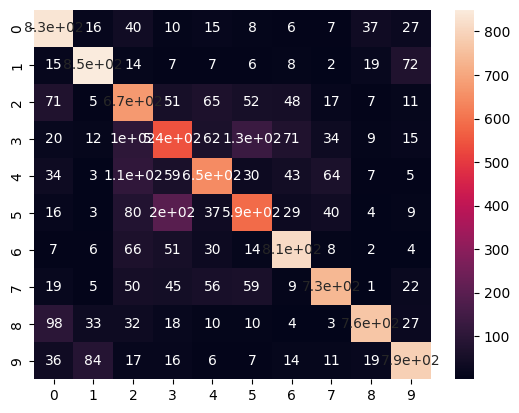

In [6]:
import seaborn as sns
sns.heatmap(conf_matrix,annot=True)

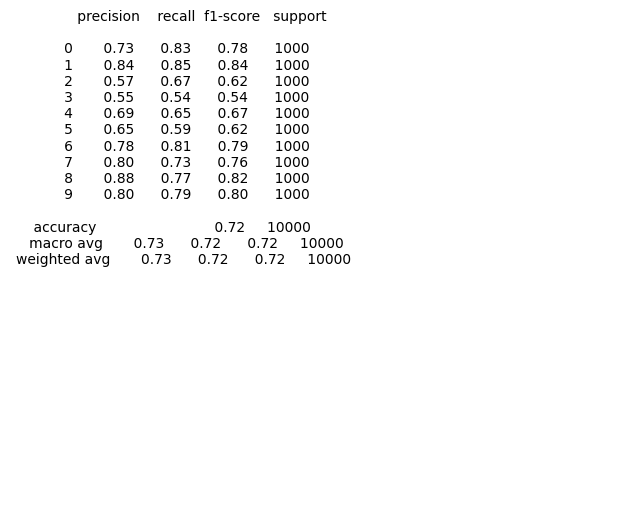

In [8]:
from sklearn.metrics import classification_report

class_report = classification_report(y_true, y_pred_classes, target_names=[str(i) for i in range(10)])

plt.figure(figsize=(8, 6))
plt.axis('off')
plt.text(0.01, 0.5, class_report)

plt.show()
